In [6]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import requests

2021-07-10T01:05:00Z


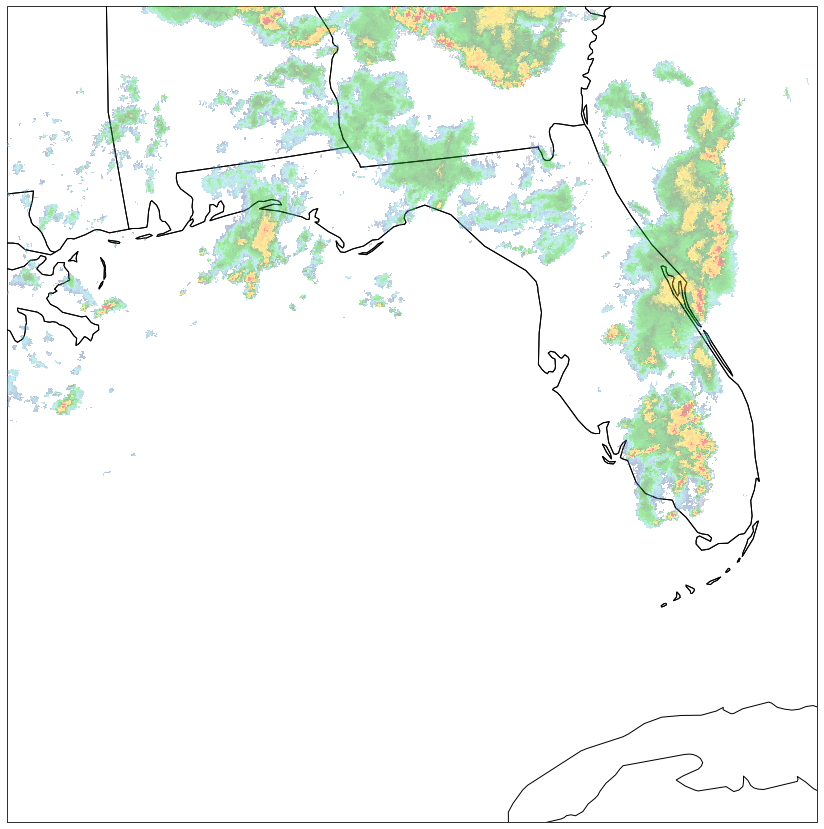

In [16]:
def get_timestamp():
    f = requests.get('https://mesonet.agron.iastate.edu/data/gis/images/4326/USCOMP/n0q_0.json').json()
    validDATE = f['meta']['valid']
    return validDATE

print(get_timestamp())

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Date string format for data reques
ax.add_wms(wms='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0q-t.cgi?',
           layers='nexrad-n0q-wmst',
           wms_kwargs={'transparent':True, 'time': get_timestamp()}, zorder=10, alpha=0.4)

ax.set_extent([-90, -80, 23, 32])

fig.subplots_adjust(wspace=0.02)